In [1]:
# This notebook is relevant to Figure 6 in the manuscript.

import pandas as pd
import matplotlib.pyplot as plt


In [30]:
#Features = pd.read_csv('IMP_Feature_matrix_acc_gt0.7_IMP_gt0.005_Jun20.csv') # supplentary table 4
Features = pd.read_csv("../Data/IMP_Feature_matrix_acc_gt0.7_IMP_gt0.005_Apr22_2024.csv")

In [4]:
Features.shape

(1668, 4)

In [31]:
Features.loc[Features['features'] == 'BCL2-RELB'].sort_values(by=['IMP'], ascending=False)

,Unnamed: 0,features,IMP,Drug
70,144,BCL2-RELB,0.006134,Venetoclax
281,90,BCL2-RELB,0.005764,Rapamycin


In [8]:
# Load data
# Gene expression from BeatAML wave 1 and 2
#Drug_data = pd.read_csv("../../../Data_resource/Drug_Response.csv",index_col = "Unnamed: 0") 
#GE = pd.read_csv("../../../Data_resource/RPKM.csv",index_col = "Unnamed: 0")


Data_dir = "/Users/guangrong/Documents/GitHub_project/AML_BeatAML/project/Data_resource/"
Drug_data = pd.read_csv(Data_dir + "Drug_Response.csv",index_col = "Unnamed: 0") 


#GE = pd.read_csv("../../../Data_resource/RPKM.csv",index_col = "Unnamed: 0")
GE = pd.read_csv(Data_dir + "RPKM.csv",index_col = "Unnamed: 0")


#Load features from features that predict drug response, regulatory graph and house keeping genes
#sele_house_keeping =  ["GPS2", "RPS10","ZNF91","FNTA","PSMC1","GPS1","MLH1","ARAF","SF3B2","PSMD2","SRP14","GNB1","HNRNPK","ARF1","RPS11"]
sele_house_keeping = ['RPS10','FNTA','COX6A1','BECN1', 'SF3B2','PSMB2','AUP1','SRP14','HNRNPK', 'CCNI', 'RHOA', 'PABPC1','RPS11','TPT1','FTL']
#KG_expr_resp = pd.read_csv("../../../../Manuscript/Supplemental_Tables/Supplementary_table_1_KG_Expr_drug_lasso_Coef_features_over0_gt50p.csv") # supplentary table 1
#KG_reg = pd.read_csv("KG_regulatory_graph_Mar1_2023.csv") # supplentary table 2
KG_expr_resp = pd.read_csv("../Data/Supplementary_table_1_KG_Expr_drug_lasso_Coef_features_over0_gt50p.csv")
#KG_reg = pd.read_csv("../Data/KG_regulatory_graph_Mar1_2023.csv")
KG_reg = pd.read_csv("../Data/KG_regulatory_graph_Mar11_2024.csv")


# Load testing data from BeatAML wave 3 and 4
BeatAML_wave_3_expr = pd.read_csv("/Users/guangrong/Documents/Datasets/AML/BeatAML-wave1-4/Beat AML collaborator files Waves 1-4/rnaseq/beataml_waves1to4_allnorm.txt", sep = "\t") 
BeatAML_wave_3_drugResponse = pd.read_csv("/Users/guangrong/Documents/Datasets/AML/BeatAML-wave1-4/Beat AML collaborator files Waves 1-4/inhibitor/beataml_probit_curve_fits_v4_distr_nonproprietary.txt", sep = "\t")

In [15]:
Features.loc[Features['features'] == 'BCL2-NFKB2'].sort_values(by=['IMP'], ascending=False).head(25)

,Unnamed: 0,features,IMP,Drug
20,21,BCL2-NFKB2,0.010216,Venetoclax


In [34]:
Features.loc[Features['Drug'] == 'Trametinib (GSK1120212)'].sort_values(by = ['IMP'], ascending = False).head(20)

,Unnamed: 0,features,IMP,Drug
75,4,CD300E-BECN1,0.027972,Trametinib (GSK1120212)
71,0,SIGLEC16-MIR553,0.019441,Trametinib (GSK1120212)
118,225,NDRG2-FNTA,0.015394,Trametinib (GSK1120212)
72,1,CD300E-COX6A1,0.015030,Trametinib (GSK1120212)
76,5,FAM101B-PSMB2,0.014800,Trametinib (GSK1120212)
95,32,SLC22A15-MIR4519,0.012503,Trametinib (GSK1120212)
81,11,SLC22A15-BECN1,0.009929,Trametinib (GSK1120212)
79,9,SIGLEC16-RPS10,0.009615,Trametinib (GSK1120212)
78,7,CA2-COX6A1,0.008506,Trametinib (GSK1120212)
88,22,SIGLEC16-MIR568,0.008360,Trametinib (GSK1120212)


In [83]:
#BeatAML_wave_3_expr.shape

/var/folders/w1/p1v0w3j165ggfdk4xpn0tzgh0000gp/T/ipykernel_88150/4212422350.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sele_drug_df['Sample'] = sele_drug_df['lab_id']


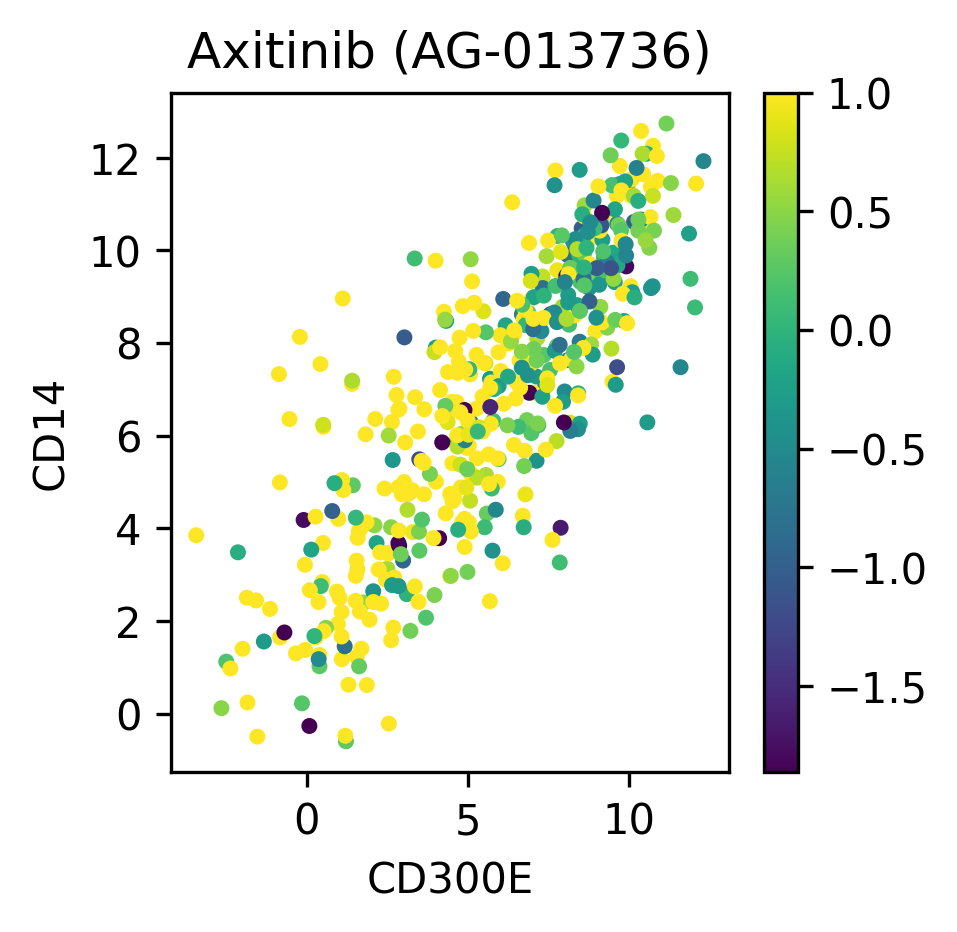

In [113]:
gene1 = "CD300E"
gene2 = "CD14"
drug = "Axitinib (AG-013736)"

ids = BeatAML_wave_3_expr.columns[4:]
gene1_expr = BeatAML_wave_3_expr.loc[BeatAML_wave_3_expr['display_label'] == gene1,].values[0][4:]
gene2_expr = BeatAML_wave_3_expr.loc[BeatAML_wave_3_expr['display_label'] == gene2,].values[0][4:]

data_sele = pd.DataFrame({"Sample":ids, gene1:gene1_expr, gene2:gene2_expr})
data_sele.index = data_sele['Sample']

sele_drug_df = BeatAML_wave_3_drugResponse.loc[BeatAML_wave_3_drugResponse['inhibitor']==drug,]
sele_drug_df['Sample'] = sele_drug_df['lab_id']
sele_drug_df.index =sele_drug_df['Sample'] 

#concat drug response and gene expression
data_com = pd.concat([data_sele, sele_drug_df], axis = 1)
data_com = data_com.dropna()

import numpy as np
data_com['logic50'] = np.log(data_com['ic50'])/np.log(10)
plt.figure(figsize=(3,3), dpi=300)

data_com[gene1 + '-' + gene2] = data_com[gene1] - data_com[gene2]
                                                           
plt.scatter(data_com[gene1], data_com[gene2], c = data_com['logic50'], cmap='viridis', s = 8)
plt.colorbar()

#plot x = y
import numpy as np
#x = np.linspace(3, 10, 10)
#y = x

#plt.plot(x, y, '-b', label='y=x')
plt.xlabel(gene1)
plt.ylabel(gene2)
plt.title(drug)
#plt.xlim(0, 12)
#plt.ylim(0, 12)
#plt.legend(loc='upper left')
plt.show()

#BeatAML_wave_3_expr.loc[BeatAML_wave_3_expr['display_label'] == 'RPS10']

In [110]:
data_com

pair_bi = []
for v in data_com[gene1 + '-' + gene2]:
    if v > 0:
        pair_bi.append(gene1 + ">" + gene2)
    else:
        pair_bi.append(gene1 + "<=" + gene2)
data_com[gene1 + '-' + gene2 + "_bi"] = pair_bi

In [76]:
data_com.columns

Index(['Sample', 'LGALS2', 'FNTA', 'lab_id', 'patient_id', 'inhibitor',
       'min_conc', 'max_conc', 'intercept', 'beta', 'beta_z', 'beta_p', 'aic',
       'pearson_chisq', 'deviance', 'converged', 'ic10', 'ic25', 'ic50',
       'ic75', 'ic90', 'auc', 'all_gt_50', 'all_lt_50', 'curve_type', 'type',
       'proprietary', 'Sample', 'logic50', 'LGALS2-FNTA', 'LGALS2-FNTA_bi'],
      dtype='object')

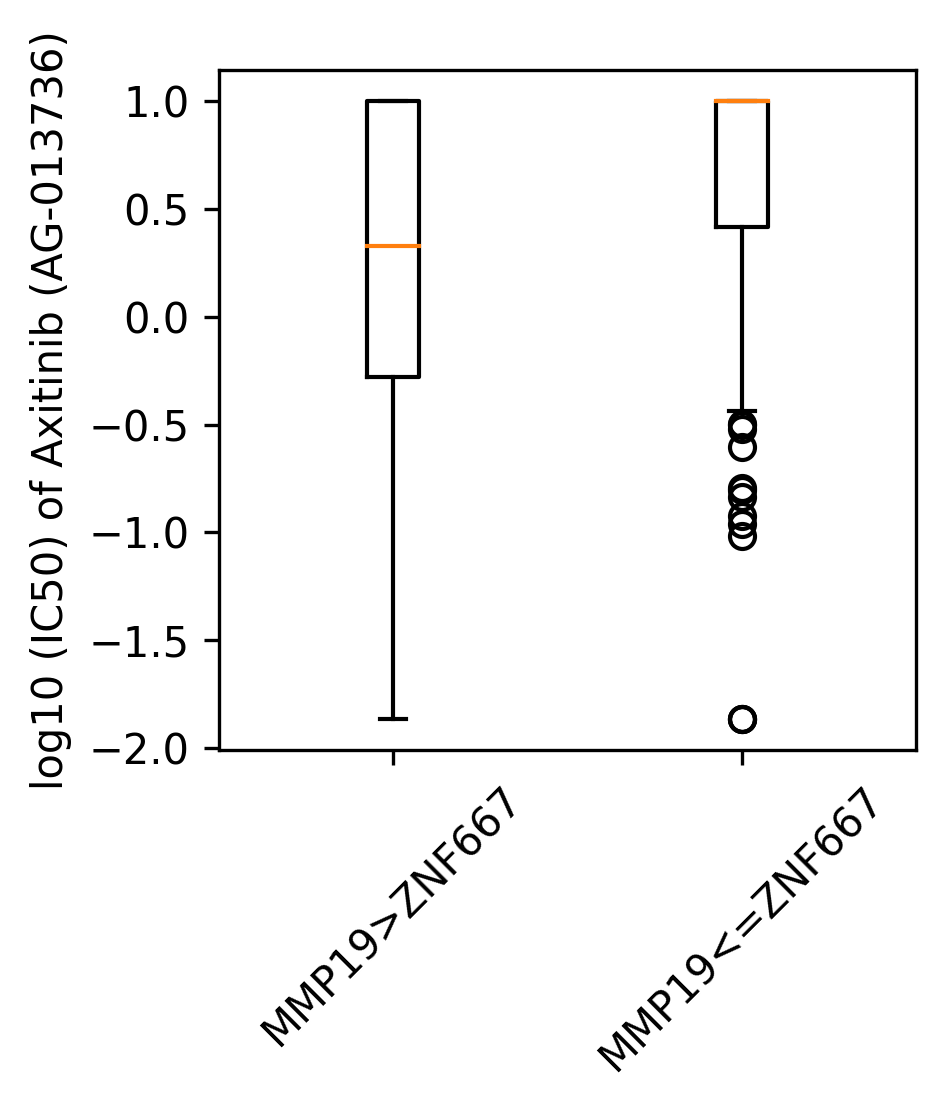

In [111]:
# boxplot of ic50 according to pair_bi feature using pyplot
plt.figure(figsize=(3,3), dpi=300)
plt.boxplot([data_com.loc[data_com[gene1 + '-' + gene2 + "_bi"] == gene1 + ">" + gene2, 'logic50'],
              data_com.loc[data_com[gene1 + '-' + gene2 + "_bi"] == gene1 + "<=" + gene2, 'logic50']], 
              labels = [gene1 + ">" + gene2, gene1 + "<=" + gene2])
plt.xticks(rotation=45)
plt.ylabel("log10 (IC50) of " + drug)
plt.show()


In [112]:

# ranksum test 


from scipy.stats import ranksums

from scipy.stats import wilcoxon

stat, p = ranksums(data_com.loc[data_com[gene1 + '-' + gene2 + "_bi"] == gene1 + ">" + gene2, 'logic50'], 
                   data_com.loc[data_com[gene1 + '-' + gene2 + "_bi"] == gene1 + "<=" + gene2, 'logic50'])
print('Statistics=%.3f, p=%.6f' % (stat, p))

Statistics=-6.905, p=0.000000
